<a href="https://colab.research.google.com/github/waghpallavi/Netflix-movies-and-TV-shows-clustering/blob/main/Netflix_movies_and_TV_shows_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Netflix movies and TV shows clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1-** Chetan Prakash
##### **Team Member 2-** Pallavi Wagh

# **Project Summary -**

This project's goal is to do a cluster analysis on a Netflix dataset in order to identify trends and group items that are similar together. Information on films, actors, directors, genres, and countries was included in the collection.

The project took a methodical approach to cluster analysis:

1. **Data Preprocessing:** To manage missing values, eliminate irrelevant columns, and convert category variables into numerical representations, the dataset was cleaned and preprocessed. Text data was also processed by eliminating stopwords and tokenizing them.
2. **Feature Extraction:** Term Frequency-Inverse Document Frequency (TF-IDF) was used to vectorize text data in order to turn textual information into numerical characteristics that could be utilised for clustering.
3. **Dimensionality Reduction:** To minimise the dimensionality of the feature space while keeping significant information, Principal Component Analysis (PCA) was used. This stage aided in successfully visualising and grouping the data.
4. **Clustering Algorithm Selection:** We explored a number of clustering techniques, including K-means and agglomerative clustering. Using assessment measures including the Davies-Bouldin Score, Calinski-Harabasz Score, and Silhouette Score, the total number of clusters was calculated. The best clustering method hyperparameters were discovered using GridSearchCV.
5. **Cluster Visualization:** Scatter plots, word clouds, and 3D plots were used to visualise the clusters. These visualisations aided in comprehending the clusters' properties and distributions.
6. **Evaluation:** The quality of the clusters was evaluated using evaluation measures such the silhouette score, Calinski-Harabasz score, and Davies-Bouldin score. These measures gave us information about the clusters' separation, compactness, and similarity.

Netflix's cluster project yielded valuable insights into its dataset, uncovering hidden patterns and grouping similar items. The analysis enabled personalized recommendations, targeted marketing, and content classification. Further refinement and exploration of algorithms, parameters, and features are needed to improve clustering performance and provide a foundation for data-driven decision making in the entertainment industry.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


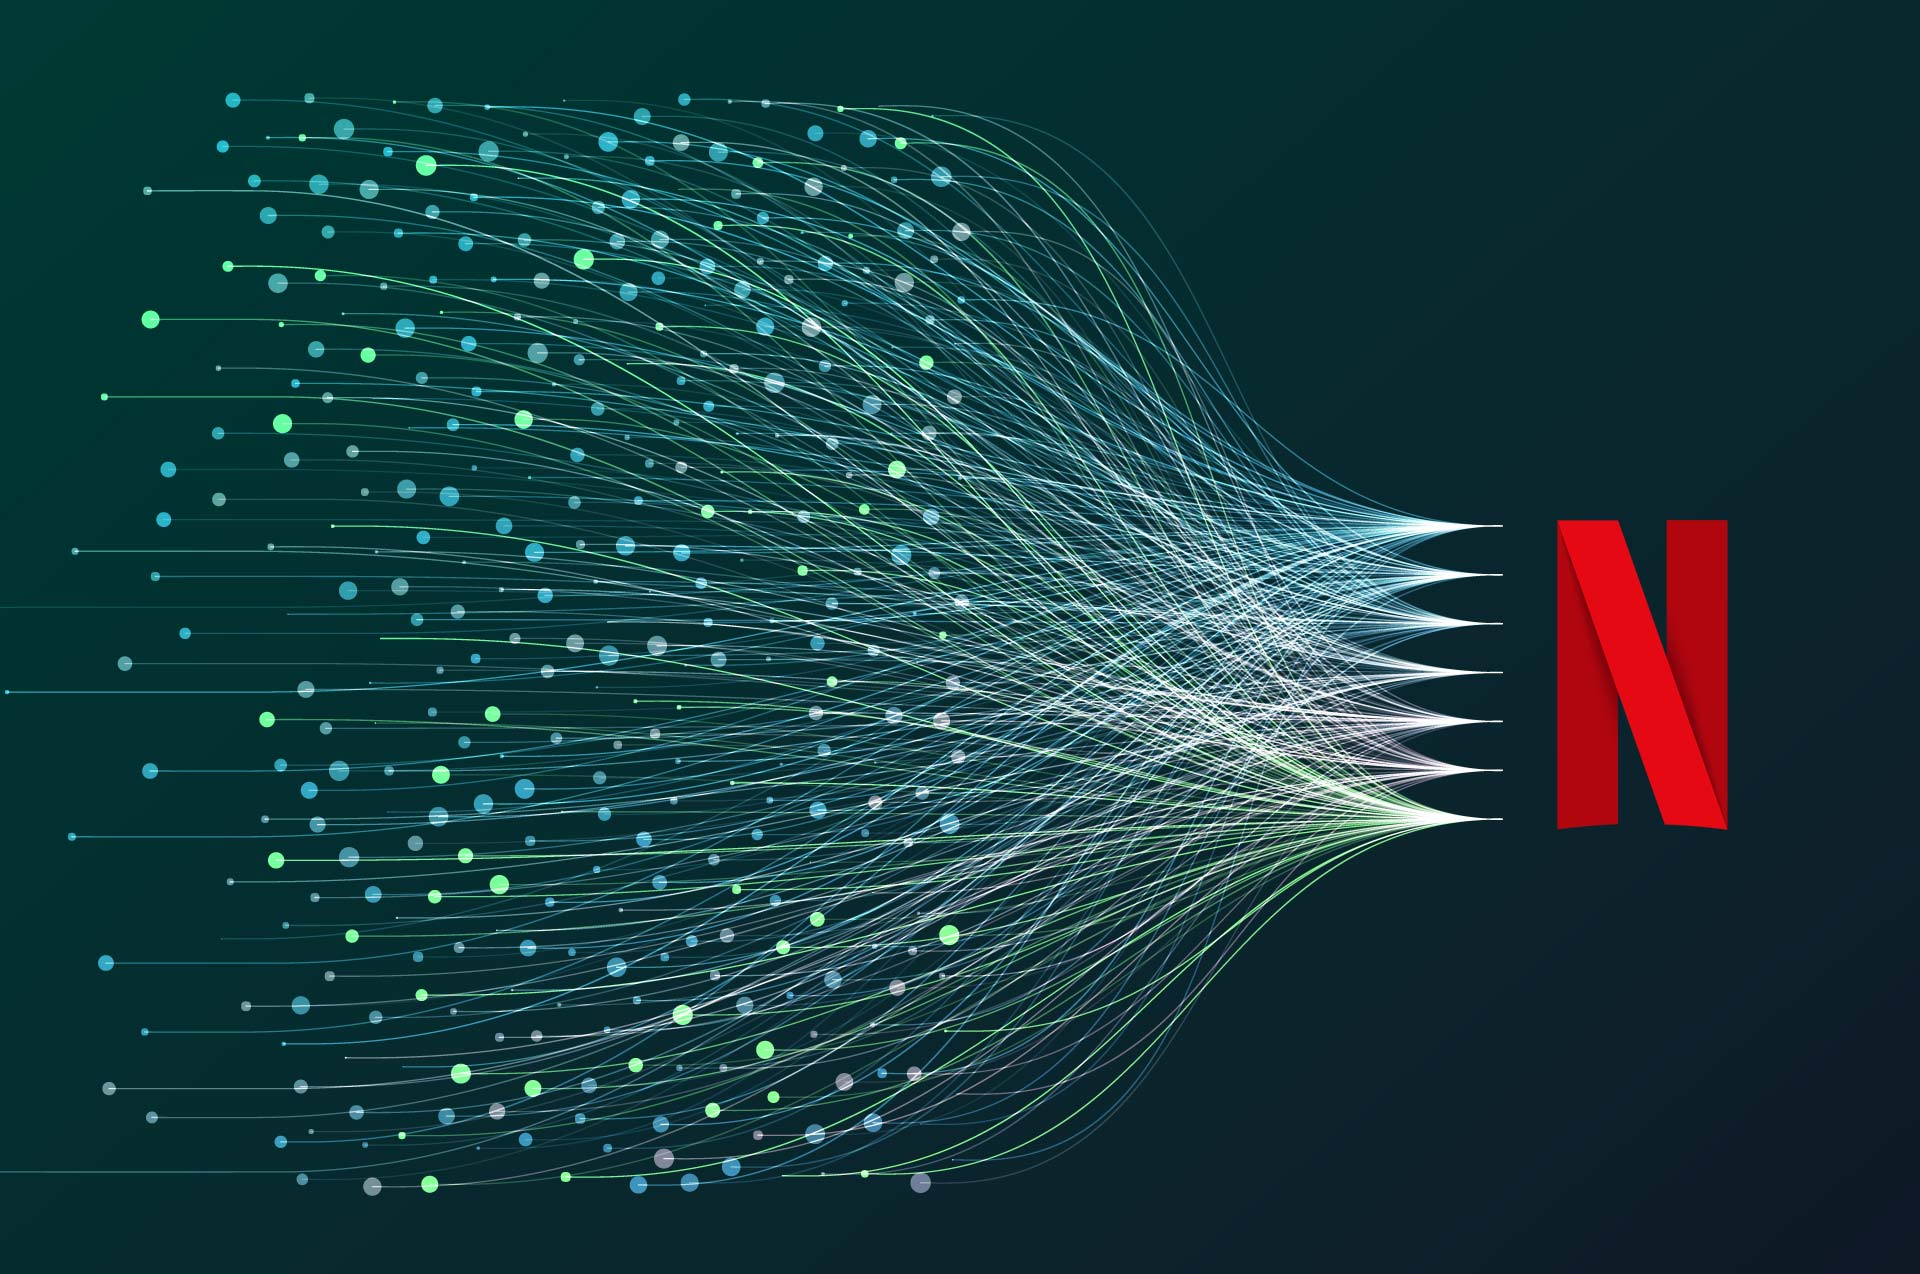

The task is to do cluster analysis on a Netflix dataset to find trends and group related things together. The dataset includes numerous information such as descriptions, actors, directors, kind, and nations, among others. The objective is to discover movie clusters based on these characteristics, enabling personalised recommendations, targeted marketing, and content classification. The research seeks to give useful insights about movie linkages and to allow data-driven decision-making in the field of entertainment.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly as px
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import missingno as miss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string
!pip install contractions
import contractions
from os import path
from PIL import Image
from collections import Counter
from nltk.corpus import stopwords
from datetime import datetime
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 18.1 MB/s eta 0:00:00


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath='/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone project/Netflix movies and TV shows clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df=pd.read_csv(filepath)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<BarContainer object of 12 artists>

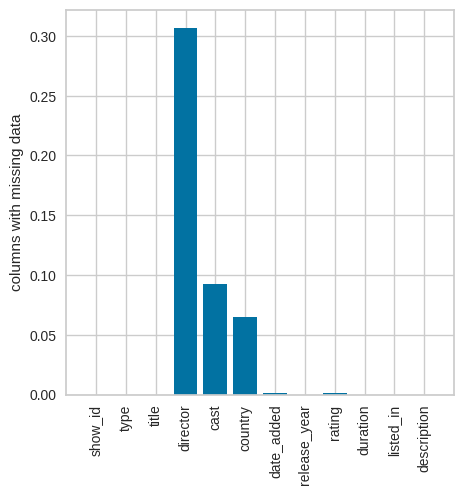

In [ ]:
# Visualizing the missing values
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(5,5))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('columns with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

<Axes: >

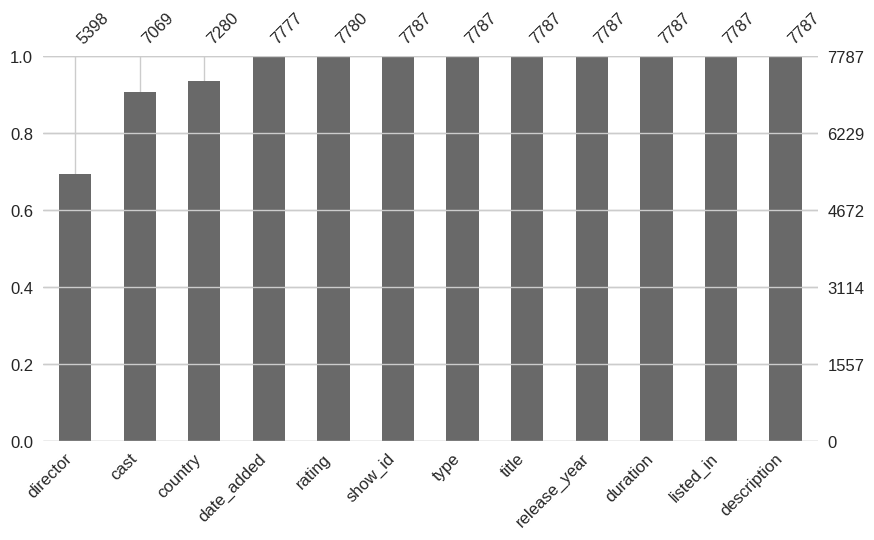

In [ ]:
# null value distribution
msno.bar(df, log=False, sort='ascending', figsize=(10,5), fontsize=12)

### What did you know about your dataset?

1. This dataset contains descriptions of Netflix TV episodes, movies, and web series.

2. There are 7787 rows and 12 columns.

3. There are 11 categorical columns and 1 numerical column.

4. There are no duplicate values present in dataset.

5. The dataset has some missing information in the Director, Cast, Country, Date, and Rating columns.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

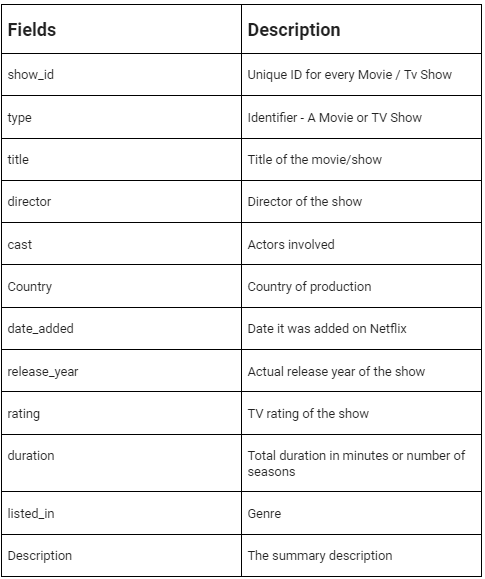

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  uni_value = df[i].nunique()
  print(f"No. of unique values in ",i,"is",uni_value,".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .
